### **Brain Tumor Detection Using CNN :**

In this machine learning project, we will build a classifier to detect the brain tumor from the MRI scan images using different CNN architecture. 

Our approach to building the classifier is discussed in the steps:

1) Perform Exploratory Data Analysis (EDA) on brain tumor dataset

2) Build a CNN model

3) Train and Evaluate our model on the dataset

In [ ]:
# Import necessary modules

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import cv2

In [ ]:
# Reading Dataset :
path = "/content/drive/MyDrive/brain_tumor_dataset"
print(os.listdir(path))

image_paths = list(paths.list_images(path))
print(len(image_paths))

['no', 'yes']
253


we iterate over each of the paths and extract the directory name (no or yes in our case which acts as the label), and resize the image size to 224×224 pixels. 

In [ ]:
images = []
labels = []

for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))

    images.append(image)
    labels.append(label)

In [ ]:
images.size

38083584

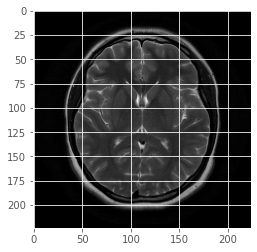

In [ ]:
# Plot an image
def plot_image(image):
    plt.imshow(image)

plot_image(images[0])

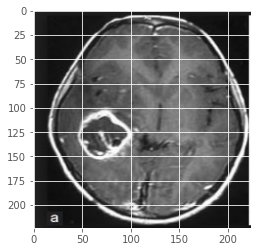

In [ ]:
plot_image(images[100])

In [ ]:
# Convert into numpy arrays
images = np.array(images) / 255.0
labels = np.array(labels)

Applying One-hot encoding to the labels.

In [ ]:
# Perform One-hot encoding
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

print(labels[0])

[1. 0.]


In [ ]:
#Split the dataset
(train_X, test_X, train_Y, test_Y) = train_test_split(images, labels, test_size= 0.20, random_state= 42, stratify= labels)

**Data Augmentation** is extremely helpful in cases where the input data is very less. So we use different transformations to increase the dataset size.

In [ ]:
# Build the Image Data Generator
train_generator = ImageDataGenerator(fill_mode= 'nearest', rotation_range= 15)

## **VGG16 Model:**

In [ ]:
# Build the model
base_model = VGG16(weights= 'imagenet', input_tensor= Input(shape = (224, 224, 3)), include_top= False)
base_input = base_model.input
base_output = base_model.output

# We remove the last layer of the VGG16 network and adding our own layer.

base_output = AveragePooling2D(pool_size=(4, 4))(base_output)
base_output = Flatten(name="flatten")(base_output)
base_output = Dense(64, activation="relu")(base_output)
base_output = Dropout(0.5)(base_output)
base_output = Dense(2, activation="softmax")(base_output)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# We are not training the VGG16 inner layer:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model = Model(inputs = base_input, outputs = base_output)
model.compile(optimizer= Adam(learning_rate= 1e-3), metrics= ['accuracy'], loss= 'binary_crossentropy')

In [ ]:
# Let's see the architecture summary of our model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#Randomly selecting the training parameters:
batch_size = 8
train_steps = len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs = 10

In [ ]:
# Fit the model
history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size),
                              steps_per_epoch= train_steps,
                              validation_data = (test_X, test_Y),
                              validation_steps= validation_steps,
                              epochs= epochs)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
25/25 [==============================] - 122s 5s/step - loss: 0.7067 - accuracy: 0.5928 - val_loss: 0.6425 - val_accuracy: 0.6078
Epoch 2/10
25/25 [==============================] - 83s 3s/step - loss: 0.6642 - accuracy: 0.5876 - val_loss: 0.6172 - val_accuracy: 0.6275
Epoch 3/10
25/25 [==============================] - 83s 3s/step - loss: 0.6355 - accuracy: 0.6392 - val_loss: 0.5901 - val_accuracy: 0.6471
Epoch 4/10
25/25 [==============================] - 82s 3s/step - loss: 0.5974 - accuracy: 0.6907 - val_loss: 0.5830 - val_accuracy: 0.8039
Epoch 5/10
25/25 [==============================] - 82s 3s/step - loss: 0.5812 - accuracy: 0.7526 - val_loss: 0.5540 - val_accuracy: 0.7059
Epoch 6/10
25/25 [==============================] - 82s 3s/step - loss: 0.5709 - accuracy: 0.7165 - val_loss: 0.5320 - val_accuracy: 0.7843
Epoch 7/10
25/25 [==============================] - 81s 3s/step - loss: 0.5308 - accuracy: 0.7732 - val_loss: 0.5134 - val_accuracy: 0.8431
Epoch 8/10
25/25 [=

In [ ]:
# Evaluate the model
predictions = model.predict(test_X, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(test_Y, axis= 1)

In [ ]:
# Print Classification report and Confusion matrix
print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))

cm = confusion_matrix(actuals, predictions)
print(cm)

              precision    recall  f1-score   support

          no       0.87      0.65      0.74        20
         yes       0.81      0.94      0.87        31

    accuracy                           0.82        51
   macro avg       0.84      0.79      0.80        51
weighted avg       0.83      0.82      0.82        51

[[13  7]
 [ 2 29]]


In [ ]:
# Final accuracy of our model
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.8235


**Using VGG16 we got accuracy of 82.35%**

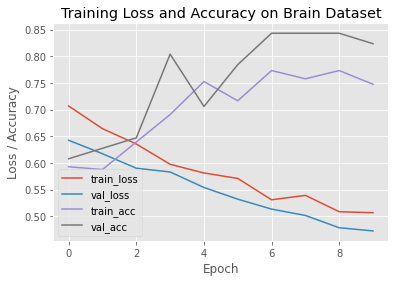

In [ ]:
# Plot the losses and accuracies
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")

plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")

plt.title("Training Loss and Accuracy on Brain Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")

## **VGG19 Model:**

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import VGG19

base_model = VGG19(weights= 'imagenet', input_tensor= Input(shape = (224, 224, 3)), include_top= False)
base_input = base_model.input

base_output = base_model.output
base_output = AveragePooling2D(pool_size=(4, 4))(base_output)
base_output = Flatten(name="flatten")(base_output)
base_output = Dense(64, activation="relu")(base_output)
base_output = Dropout(0.5)(base_output)
base_output = Dense(2, activation="softmax")(base_output)



for layer in base_model.layers:
    layer.trainable = False


from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

model = Model(inputs = base_input, outputs = base_output)
model.compile(optimizer= Adam(learning_rate= 1e-3), metrics= ['accuracy'], loss= 'binary_crossentropy')



batch_size = 8
train_steps = len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs = 10


history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size), 
                              steps_per_epoch= train_steps, validation_data = (test_X, test_Y), validation_steps= validation_steps, epochs= epochs)

80150528/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
25/25 [==============================] - 104s 4s/step - loss: 0.7313 - accuracy: 0.5773 - val_loss: 0.6742 - val_accuracy: 0.6078
Epoch 2/10
25/25 [==============================] - 101s 4s/step - loss: 0.6467 - accuracy: 0.6289 - val_loss: 0.6261 - val_accuracy: 0.6471
Epoch 3/10
25/25 [==============================] - 101s 4s/step - loss: 0.6273 - accuracy: 0.6701 - val_loss: 0.6170 - val_accuracy: 0.7647
Epoch 4/10
25/25 [==============================] - 101s 4s/step - loss: 0.5957 - accuracy: 0.6959 - val_loss: 0.5862 - val_accuracy: 0.6471
Epoch 5/10
25/25 [==============================] - 101s 4s/step - loss: 0.5924 - accuracy: 0.6959 - val_loss: 0.5716 - val_accuracy: 0.7059
Epoch 6/10
25/25 [==============================] - 101s 4s/step - loss: 0.5737 - accuracy: 0.6804 - val_loss: 0.5626 - val_accuracy: 0.7255
Epoch 7/10
25/25 [==============================] - 101s 4s/step - loss: 0.5702 - accuracy: 0.7474 - val_loss: 0.5519 - val_accuracy: 0.7843
Epoch 8/10
25

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(test_X, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(test_Y, axis= 1)

print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))

cm = confusion_matrix(actuals, predictions)
print(cm)

              precision    recall  f1-score   support

          no       0.80      0.60      0.69        20
         yes       0.78      0.90      0.84        31

    accuracy                           0.78        51
   macro avg       0.79      0.75      0.76        51
weighted avg       0.79      0.78      0.78        51

[[12  8]
 [ 3 28]]


In [ ]:
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.7843


**Using CGG19 we got accuracy of 78.43%**

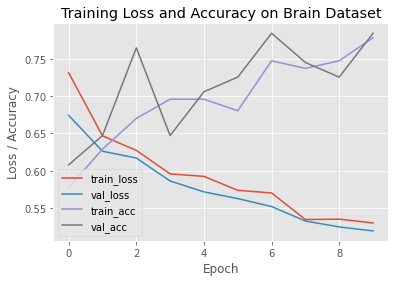

In [ ]:
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")

plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")

plt.title("Training Loss and Accuracy on Brain Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")

**The accuracy with VGG16 : 82.35%**

**The accuracy with VGG19 : 78.43%**